In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
9,117,195,18437.0,18813.0
14,118,170,18145.0,18182.0
56,119,81,13471.0,15748.0
42,120,93,16488.0,17026.0
13,121,171,18037.0,18286.0
12,122,174,21297.0,21776.0
58,123,74,16921.0,19596.0
18,124,158,15343.0,16969.0
59,125,71,19431.0,23980.0
69,126,65,16700.0,16995.0


In [16]:
data2['user'].max()

'1206paul_'

In [17]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
122,122,174,21297.0,21776.0
123,123,74,16921.0,19596.0
124,124,158,15343.0,16969.0
125,125,71,19431.0,23980.0
126,126,65,16700.0,16995.0


In [18]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,127.000000,127.000000,127.000000,127.000000
mean,63.000000,86.338583,16229.480315,19590.125984
std,36.805797,71.126003,8670.467993,7719.786406
min,0.000000,1.000000,0.000000,5257.000000
25%,31.500000,40.000000,12513.500000,17078.000000
50%,63.000000,68.000000,17064.000000,18954.000000
75%,94.500000,113.500000,19361.000000,22261.500000
max,126.000000,387.000000,86225.000000,86710.000000


In [19]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,70,17164.0,17697.0,4.767778,4.915833
1,1,82,15971.0,17831.0,4.436389,4.953056
2,2,88,11784.0,19147.0,3.273333,5.318611
3,3,7,2553.0,17451.0,0.709167,4.847500
4,4,93,18306.0,18734.0,5.085000,5.203889


In [20]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,70,17164.0,17697.0,4.767778,4.915833,96.988190
1,1,82,15971.0,17831.0,4.436389,4.953056,89.568729
2,2,88,11784.0,19147.0,3.273333,5.318611,61.544890
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
4,4,93,18306.0,18734.0,5.085000,5.203889,97.715384
5,5,27,17580.0,20382.0,4.883333,5.661667,86.252576
6,6,4,12123.0,16563.0,3.367500,4.600833,73.193262
7,7,20,8423.0,17773.0,2.339722,4.936944,47.392112
8,8,50,18471.0,18686.0,5.130833,5.190556,98.849406
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350


In [21]:
stream_stats['persenteg'].describe()

count    127.000000
mean      81.752356
std       22.788883
min        0.000000
25%       78.320862
50%       90.284679
75%       97.338687
max       99.796502
Name: persenteg, dtype: float64

In [22]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
56,56,1,0.0,16004.0,0.000000,4.445556,0.000000
108,108,3,673.0,21164.0,0.186944,5.878889,3.179928
58,58,6,1641.0,17445.0,0.455833,4.845833,9.406707
10,10,21,818.0,8327.0,0.227222,2.313056,9.823466
52,52,7,1525.0,12221.0,0.423611,3.394722,12.478521
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350
57,57,9,6957.0,21863.0,1.932500,6.073056,31.820885
34,34,15,9267.0,22676.0,2.574167,6.298889,40.866996
28,28,53,7369.0,17430.0,2.046944,4.841667,42.277682


In [23]:
stream_stats['watch_length_in_hour'].sum() /24

23.85583333333334

In [24]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
56,56,1,0.0,16004.0,0.000000,4.445556,0.000000
108,108,3,673.0,21164.0,0.186944,5.878889,3.179928
58,58,6,1641.0,17445.0,0.455833,4.845833,9.406707
10,10,21,818.0,8327.0,0.227222,2.313056,9.823466
52,52,7,1525.0,12221.0,0.423611,3.394722,12.478521
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350
57,57,9,6957.0,21863.0,1.932500,6.073056,31.820885
34,34,15,9267.0,22676.0,2.574167,6.298889,40.866996
28,28,53,7369.0,17430.0,2.046944,4.841667,42.277682


In [25]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
85,85,86,21524.0,21814.0,5.978889,6.059444,98.670579
8,8,50,18471.0,18686.0,5.130833,5.190556,98.849406
89,89,59,25210.0,25491.0,7.002778,7.080833,98.897650
77,77,51,14829.0,14994.0,4.119167,4.165000,98.899560
106,106,23,22381.0,22610.0,6.216944,6.280556,98.987174
86,86,118,23676.0,23912.0,6.576667,6.642222,99.013048
26,26,387,35885.0,36105.0,9.968056,10.029167,99.390666
112,112,191,86225.0,86710.0,23.951389,24.086111,99.440664
91,91,98,22174.0,22260.0,6.159444,6.183333,99.613657
118,118,170,18145.0,18182.0,5.040278,5.050556,99.796502


In [26]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
117,117,195,18437.0,18813.0,5.121389,5.225833,98.001382
118,118,170,18145.0,18182.0,5.040278,5.050556,99.796502
119,119,81,13471.0,15748.0,3.741944,4.374444,85.541021
120,120,93,16488.0,17026.0,4.580000,4.729444,96.840127
121,121,171,18037.0,18286.0,5.010278,5.079444,98.638303
122,122,174,21297.0,21776.0,5.915833,6.048889,97.800331
123,123,74,16921.0,19596.0,4.700278,5.443333,86.349255
124,124,158,15343.0,16969.0,4.261944,4.713611,90.417821
125,125,71,19431.0,23980.0,5.397500,6.661111,81.030025
126,126,65,16700.0,16995.0,4.638889,4.720833,98.264195


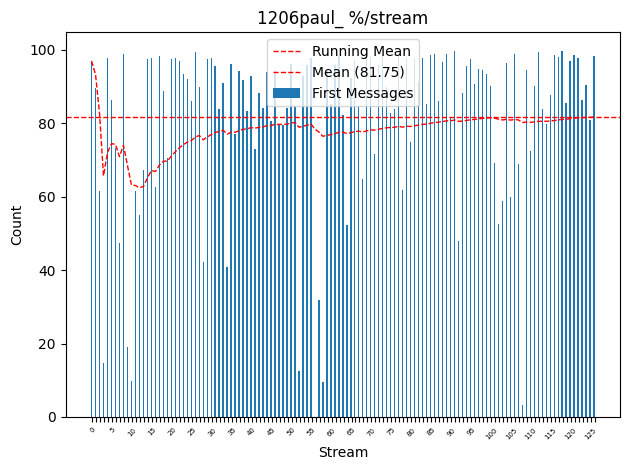

In [27]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()